In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')



from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Title: "Analyzing Twitter Sentiments: A Deep Learning Approach for Depression Detection using RNN, LSTM, and GRU"

# Description:
# This NLP-based project employs advanced neural network architectures, including Recurrent Neural Networks (RNN), Long Short-Term Memory (LSTM), and Gated Recurrent Unit (GRU), to analyze Twitter data and accurately identify individuals suffering from depression. Achieving an impressive accuracy of 97% with RNN and LSTM, and 96% with GRU, the project showcases the power of deep learning in understanding and interpreting complex human emotions through textual data. The comprehensive text preprocessing techniques, coupled with diligent efforts to address overfitting and underfitting, contribute to the robustness of the model. By leveraging state-of-the-art technologies, this project paves the way for more effective mental health screening and support in the digital age.

In [8]:
df=pd.read_csv('tweet.csv')
df

,Index,message to examine,label (depression result)
0,599052,@PlayRadioPlay yay for coming back to Dallas ...,0
1,599325,Ok - updated it New dose of fun at http://utu...,0
2,599326,@Spoonsie LÃ¢che pas la patate ma belle! I wi...,0
3,599330,@MsNabilalah Aww! you're welcome!,0
4,599873,@Wossy Does this mean that you will only be ab...,0
...,...,...,...
4311,802309,No Depression by G Herbo is my mood from now o...,1
4312,802310,What do you do when depression succumbs the br...,1
4313,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
4314,802312,dont mistake a bad day with depression! everyo...,1


In [9]:
df.isnull().sum()/df.shape[0]*100

Index                        0.0
message to examine           0.0
label (depression result)    0.0
dtype: float64

In [10]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
#now use first wordCloud
#call wordcloud; inbuilt class
from wordcloud import WordCloud,STOPWORDS

In [12]:
# Create an object of the WordCloud class
my_cloud = WordCloud(width=1000, height=1000, background_color="white",min_font_size=10)

In [13]:
my_cloud.generate(''.join(df[df['label (depression result)']==0]['message to examine']))

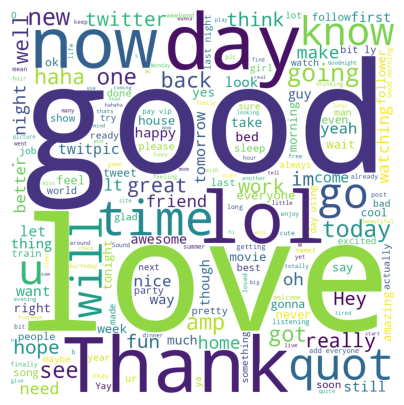

In [14]:
plt.figure(figsize=(5,5))
plt.imshow(my_cloud)
plt.axis('off')
plt.show()

In [19]:
# Create an object of the WordCloud class
my_cloud_depressed = WordCloud(width=1000, height=1000, background_color="white",min_font_size=10)


In [20]:
my_cloud_depressed.generate(''.join(df[df['label (depression result)']==1]['message to examine']))

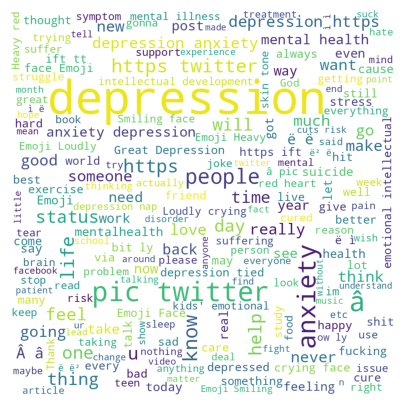

In [21]:
plt.figure(figsize=(5,5))
plt.imshow(my_cloud_depressed)
plt.axis('off')
plt.show()

In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from string import punctuation

In [23]:
#data cleaning
def clean_text(text):
    stop=stopwords.words('english') #stopwords remove
    punc=list(punctuation) #punctuation list remove
    bad_tokens=stop+punc
    lemma=WordNetLemmatizer()
    tokens=word_tokenize(text) #tokenization
    word_tokens=[ t for t in tokens if t.isalpha()] #remove number
    clean_token=[lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [25]:
#we apply the same clean_text() on the entire column of Message of dataset
df['message to examine']=df['message to examine'].apply(clean_text) #passing the function in apply() inbuilt function
#df[message] is a parameter

In [26]:
df

,Index,message to examine,label (depression result)
0,599052,playradioplay yay coming back dallas amp lolzz...,0
1,599325,ok updated new dose fun http,0
2,599326,spoonsie pa la patate belle i cheering,0
3,599330,msnabilalah aww welcome,0
4,599873,wossy doe mean able fly circle,0
...,...,...,...
4311,802309,no depression g herbo mood done stressing peop...,1
4312,802310,what depression succumbs brain make feel like ...,1
4313,802311,ketamine nasal spray show promise against depr...,1
4314,802312,dont mistake bad day depression everyone,1


In [40]:
X=df['message to examine'] #input features
Y=df['label (depression result)'] #output target variable which we want to predict

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [43]:
sent_len=[]
for sent in df['message to examine']:
    sent_len.append(len(word_tokenize(sent)))
#to add new column in existing dataframe
df['sent_len']=sent_len
df.head

<bound method NDFrame.head of        Index                                 message to examine  \
0     599052  playradioplay yay coming back dallas amp lolzz...   
1     599325                       ok updated new dose fun http   
2     599326             spoonsie pa la patate belle i cheering   
3     599330                            msnabilalah aww welcome   
4     599873                     wossy doe mean able fly circle   
...      ...                                                ...   
4311  802309  no depression g herbo mood done stressing peop...   
4312  802310  what depression succumbs brain make feel like ...   
4313  802311  ketamine nasal spray show promise against depr...   
4314  802312           dont mistake bad day depression everyone   
4315  802313                                                      

      label (depression result)  sent_len  
0                             0         9  
1                             0         6  
2                             0         7  
3                             0         3  
4                             0         6  
...                         ...       ...  
4311                          1         9  
4312                          1         9  
4313                          1        10  
4314                          1         6  
4315                          1         0  

[4316 rows x 4 columns]>

In [44]:
df

,Index,message to examine,label (depression result),sent_len
0,599052,playradioplay yay coming back dallas amp lolzz...,0,9
1,599325,ok updated new dose fun http,0,6
2,599326,spoonsie pa la patate belle i cheering,0,7
3,599330,msnabilalah aww welcome,0,3
4,599873,wossy doe mean able fly circle,0,6
...,...,...,...,...
4311,802309,no depression g herbo mood done stressing peop...,1,9
4312,802310,what depression succumbs brain make feel like ...,1,9
4313,802311,ketamine nasal spray show promise against depr...,1,10
4314,802312,dont mistake bad day depression everyone,1,6


In [45]:
df['sent_len'].value_counts()

8     332
6     302
4     299
5     297
7     278
10    274
9     263
11    240
3     238
12    187
13    177
14    166
2     148
16    130
15    116
17     91
18     78
19     66
23     64
21     62
22     55
26     50
24     48
20     46
25     41
28     37
27     37
29     35
1      28
31     25
32     22
30     20
34     12
33     11
0       9
35      7
37      5
42      3
39      3
40      2
43      2
36      2
50      1
54      1
44      1
58      1
49      1
38      1
51      1
55      1
Name: sent_len, dtype: int64

In [46]:
max(sent_len)

58

In [47]:
df['sent_len'].unique()

array([ 9,  6,  7,  3, 13, 11,  4, 10,  5,  2, 14,  8, 12, 15, 18, 16, 17,
       24, 19,  1,  0, 23, 20, 22, 21, 27, 44, 30, 25, 34, 31, 29, 33, 32,
       26, 28, 35, 37, 39, 50, 40, 54, 43, 36, 42, 58, 49, 38, 51, 55])

In [48]:
np.quantile(sent_len,0.95) #take sentence 95% and 5 secrify

27.0

In [59]:
max_len=27

In [49]:
#tokenization high level api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,SimpleRNN,GRU
from tensorflow.keras.models import Sequential

In [50]:
#tokenization
#create object for tokenizer class
tok=Tokenizer(char_level=False,split=" ")  #char level-a b c d
tok.fit_on_texts(x_train)

In [51]:
tok.index_word

{1: 'depression',
 2: 'i',
 3: 'http',
 4: 'emoji',
 5: 'anxiety',
 6: 'like',
 7: 'day',
 8: 'get',
 9: 'good',
 10: 'face',
 11: 'know',
 12: 'love',
 13: 'u',
 14: 'time',
 15: 'one',
 16: 'it',
 17: 'go',
 18: 'people',
 19: 'the',
 20: 'going',
 21: 'life',
 22: 'you',
 23: 'thing',
 24: 'back',
 25: 'make',
 26: 'today',
 27: 'lol',
 28: 'really',
 29: 'got',
 30: 'help',
 31: 'see',
 32: 'much',
 33: 'great',
 34: 'new',
 35: 'feel',
 36: 'think',
 37: 'never',
 38: 'want',
 39: 'need',
 40: 'well',
 41: 'my',
 42: 'work',
 43: 'na',
 44: 'mental',
 45: 'friend',
 46: 'quot',
 47: 'thanks',
 48: 'year',
 49: 'and',
 50: 'would',
 51: 'im',
 52: 'ca',
 53: 'health',
 54: 'way',
 55: 'right',
 56: 'even',
 57: 'someone',
 58: 'let',
 59: 'hope',
 60: 'could',
 61: 'night',
 62: 'better',
 63: 'come',
 64: 'take',
 65: 'happy',
 66: 'say',
 67: 'still',
 68: 'a',
 69: 'heart',
 70: 'feeling',
 71: 'haha',
 72: 'cry',
 73: 'how',
 74: 'everyone',
 75: 'gon',
 76: 'amp',
 77: 'if',
 

In [52]:
vocab_len=len(tok.index_word)
vocab_len #unique word

8758

In [53]:
sequences_train=tok.texts_to_sequences(x_train) #change each every word into vector #sentence to vector ((document unique id))

In [54]:
print(sequences_train)

[[3168, 3169, 3170, 3171, 3172, 3173, 612, 1090, 3174, 3175, 3176, 258, 3177, 3178, 113, 821, 674, 220, 3179, 1091, 13, 3180], [3181, 2, 393, 927, 928, 8, 1584, 1, 86, 1585, 104, 929, 2, 351, 439, 15], [96, 87, 1], [1, 1586, 3182], [3183, 3184], [417, 505], [1, 613, 5, 367, 614, 1282, 930, 3185, 1587, 2076, 3], [51, 1588, 1589, 6, 1590, 326, 352, 83, 1, 288, 57, 50, 931, 472, 51, 1591, 3186], [20, 3187, 75, 43, 473, 506, 1283, 76, 129, 3188, 1592, 1592, 1592, 71, 147], [130, 550, 9, 3189, 1284, 675, 1, 353, 244, 5, 3190, 550, 932, 734, 615, 9, 3191, 418, 221, 2077, 439, 440, 3], [3192, 2078, 155, 2, 474, 1092, 2, 148, 441, 222, 15, 45, 3193, 3194], [312, 368, 1, 14, 149, 3195, 3196, 3], [3197, 47, 65, 551, 2, 59, 33, 7], [3198, 177, 33, 7, 26], [2, 1285, 1, 2, 37, 89, 9, 4, 822, 10, 3], [3199, 419, 3200, 3201, 3202, 507], [2079, 1, 139, 42, 552, 186, 223, 2080], [18, 245, 1593, 25, 224, 1, 354, 3203, 616, 113, 187, 113, 186, 113, 1594, 113, 258, 676, 327, 258, 369, 25, 224, 113, 2081, 

In [55]:
x_train.shape

(3452,)

In [60]:
sequence_matrix_train=sequence.pad_sequences(sequences_train,maxlen=max_len)
sequence_matrix_train

array([[   0,    0,    0, ..., 1091,   13, 3180],
       [   0,    0,    0, ...,  351,  439,   15],
       [   0,    0,    0, ...,   96,   87,    1],
       ...,
       [   0,    0,    0, ...,    0,  629,   79],
       [   0,    0,    0, ...,  102, 8754, 8755],
       [   0,    0,    0, ..., 3158, 8758,  287]], dtype=int32)

In [61]:
sequence_matrix_train[4]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 3183, 3184], dtype=int32)

In [62]:
len(sequence_matrix_train[4]) # checking each record is 328

27

In [63]:
#tokenization
#create object for tokenizer class
tok1=Tokenizer(char_level=False,split=" ")  #char level-a b c d
tok1.fit_on_texts(x_test)

In [64]:
tok1.index_word

{1: 'depression',
 2: 'i',
 3: 'http',
 4: 'emoji',
 5: 'anxiety',
 6: 'get',
 7: 'people',
 8: 'day',
 9: 'time',
 10: 'like',
 11: 'good',
 12: 'u',
 13: 'know',
 14: 'the',
 15: 'love',
 16: 'it',
 17: 'face',
 18: 'one',
 19: 'feel',
 20: 'think',
 21: 'go',
 22: 'going',
 23: 'help',
 24: 'really',
 25: 'got',
 26: 'see',
 27: 'great',
 28: 'mental',
 29: 'stress',
 30: 'would',
 31: 'just',
 32: 'make',
 33: 'thing',
 34: 'take',
 35: 'life',
 36: 'ca',
 37: 'new',
 38: 'friend',
 39: 'you',
 40: 'work',
 41: 'today',
 42: 'back',
 43: 'show',
 44: 'much',
 45: 'lol',
 46: 'way',
 47: 'better',
 48: 'need',
 49: 'bad',
 50: 'someone',
 51: 'last',
 52: 'and',
 53: 'everyone',
 54: 'let',
 55: 'night',
 56: 'getting',
 57: 'come',
 58: 'health',
 59: 'we',
 60: 'year',
 61: 'say',
 62: 'a',
 63: 'my',
 64: 'want',
 65: 'something',
 66: 'mom',
 67: 'well',
 68: 'twitter',
 69: 'illness',
 70: 'fun',
 71: 'hand',
 72: 'every',
 73: 'right',
 74: 'cry',
 75: 'that',
 76: 'also',
 77

In [65]:
vocab_len1=len(tok1.index_word)
vocab_len1 #unique word

3529

In [66]:
sequences_test=tok.texts_to_sequences(x_test) #change each every word into vector #sentence to vector ((document unique id))
sequences_test

[[415, 420, 1, 228, 151, 48, 35, 1],
 [1522,
  22,
  85,
  39,
  88,
  312,
  66,
  1485,
  1337,
  312,
  225,
  44,
  163,
  224,
  68,
  18,
  4487,
  1337,
  671,
  229,
  213,
  292,
  224,
  2,
  44,
  163,
  1,
  5,
  16,
  224],
 [4452,
  13,
  692,
  11,
  4452,
  1638,
  13,
  692,
  11,
  13,
  537,
  234,
  51,
  86,
  108,
  186,
  373,
  19,
  14,
  49,
  41,
  21,
  274,
  931,
  8008,
  319],
 [612],
 [537, 74, 1222, 1416, 681, 194, 102, 1, 3],
 [2, 7870, 18],
 [5, 1, 1250, 5, 1],
 [5961],
 [94, 11, 603, 6, 1294, 1966, 785],
 [1605,
  2,
  273,
  525,
  14,
  268,
  5581,
  675,
  1960,
  33,
  1,
  754,
  256,
  56,
  7826,
  2975,
  594,
  3395,
  256,
  19],
 [2, 313, 58, 135],
 [46, 222, 344, 46, 1872, 7067, 261],
 [97, 872, 1202, 61, 1690, 747, 284, 32, 286, 416, 3],
 [9, 61, 568],
 [92, 197, 688, 28, 170, 337, 205, 22, 1019, 1210],
 [312, 188, 3, 505, 312, 1356, 3942, 312, 20, 2500],
 [92, 465, 2, 213, 2, 65, 13, 38, 618],
 [19, 1045, 4353, 143, 1, 868, 1238, 251,

In [67]:
sequence_matrix_test=sequence.pad_sequences(sequences_test,maxlen=max_len)
sequence_matrix_test

array([[   0,    0,    0, ...,   48,   35,    1],
       [  39,   88,  312, ...,    5,   16,  224],
       [   0, 4452,   13, ...,  931, 8008,  319],
       ...,
       [   0,    0,    0, ...,    0,    0, 1078],
       [   0,    0,    0, ...,    0,  687, 1033],
       [   0,    0,    0, ..., 1123,  879,  821]], dtype=int32)

In [68]:
sequence_matrix_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 415, 420,   1, 228, 151,  48,  35,
         1], dtype=int32)

In [69]:
len(sequence_matrix_test[0])

27

In [70]:
# create procedure to decide number of iterations or epochs
# first early stopping class
from tensorflow.keras.callbacks import EarlyStopping
#create a object of early stopping class
cb=EarlyStopping(
    monitor="val_loss",# val loss validation loss means testing error (testing loss)  # if it is accuary it will stop at accuarcay
    min_delta=0.00001,  #delta min learning rate #lyma value of early stopping #fixing weight and bias
    patience=20, #not stoping immediately
    verbose=1,  #it show me where  the early stopping has taken place
    mode="auto",
    baseline=None, #nueral network decided automatic
    restore_best_weights=False #default true but false it will assign first weights

)
#mmpvmbr

In [71]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,SimpleRNN,GRU

In [110]:
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,SimpleRNN,GRU
#create the object of sequential class
model=Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True)) #unique id of word convert into vector
#second parameter=200 pass will be output length
model.add(SimpleRNN(64,activation='tanh')) #tanH activation function in sequencial data
# model.add(LSTM(64,activation='tanh'))
# model.add(GRU(64,activation='tanh'))
# kernel_regularizer=regularizers.l2(0.01)
model.add(Dense(32,activation='relu'))
# kernel_regularizer=regularizers.l2(0.01)

model.add(Dropout(0.2))
#output layer
model.add(Dense(1,activation='sigmoid'))

In [111]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 27, 500)           4379500   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                36160     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4417773 (16.85 MB)
Trainable params: 4417773 (16.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])  #ada grad +momentum

In [113]:
trained_model=model.fit(sequence_matrix_train,y_train,epochs=5000,callbacks=cb,validation_data=(sequence_matrix_test,y_test),batch_size=50) #mini batch size


Epoch 1/5000
70/70 [==============================] - 8s 95ms/step - loss: 0.3140 - accuracy: 0.8696 - val_loss: 0.0951 - val_accuracy: 0.9815
Epoch 2/5000
70/70 [==============================] - 5s 78ms/step - loss: 0.0310 - accuracy: 0.9928 - val_loss: 0.1086 - val_accuracy: 0.9595
Epoch 3/5000
70/70 [==============================] - 6s 89ms/step - loss: 0.0158 - accuracy: 0.9959 - val_loss: 0.1005 - val_accuracy: 0.9745
Epoch 4/5000
70/70 [==============================] - 5s 77ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.1054 - val_accuracy: 0.9757
Epoch 5/5000
70/70 [==============================] - 6s 89ms/step - loss: 0.0030 - accuracy: 0.9983 - val_loss: 0.1293 - val_accuracy: 0.9641
Epoch 6/5000
70/70 [==============================] - 7s 105ms/step - loss: 0.0025 - accuracy: 0.9983 - val_loss: 0.1277 - val_accuracy: 0.9676
Epoch 7/5000
70/70 [==============================] - 6s 89ms/step - loss: 0.0023 - accuracy: 0.9983 - val_loss: 0.1344 - val_accuracy: 0.967

In [114]:
print("print train_loss and Train_accuarcay",model.evaluate(sequence_matrix_train,y_train))
print("print test_loss and Test_accuarcay",model.evaluate(sequence_matrix_test,y_test))

108/108 [==============================] - 1s 5ms/step - loss: 0.0015 - accuracy: 0.9994
print train_loss and Train_accuarcay [0.001451364834792912, 0.9994206428527832]
27/27 [==============================] - 0s 5ms/step - loss: 0.1739 - accuracy: 0.9606
print test_loss and Test_accuarcay [0.17387457191944122, 0.9606481194496155]


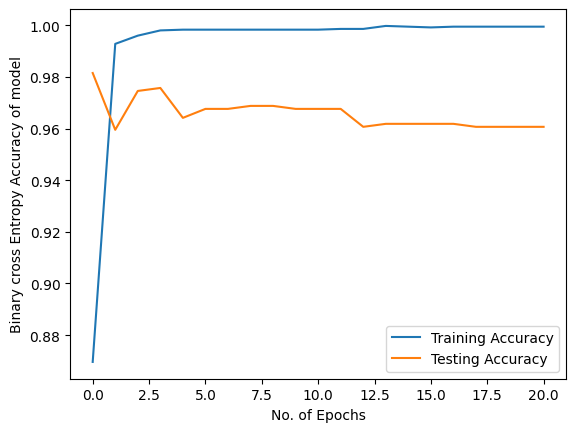

In [115]:
#visulisation of training and testing accuracy
plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel('Binary cross Entropy Accuracy of model')
plt.legend()
plt.show()

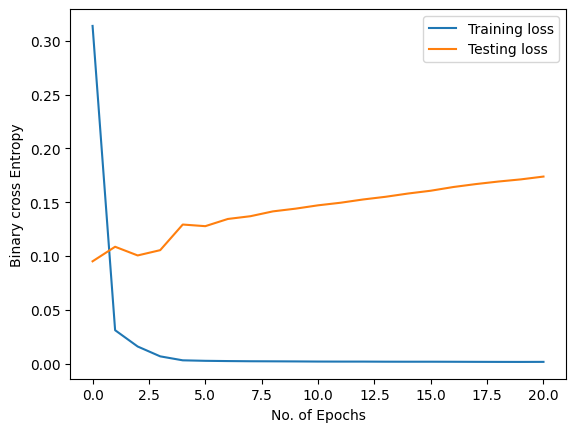

In [116]:
plt.plot(trained_model.history['loss'],label='Training loss')
plt.plot(trained_model.history['val_loss'],label='Testing loss')
plt.xlabel("No. of Epochs")
plt.ylabel('Binary cross Entropy')
plt.legend()
plt.show()

In [117]:
y_pred=model.predict(sequence_matrix_test)
y_pred

27/27 [==============================] - 0s 5ms/step


array([[1.00000000e+00],
       [9.99999404e-01],
       [9.99998331e-01],
       [3.13876979e-02],
       [1.00000000e+00],
       [2.97725797e-02],
       [1.00000000e+00],
       [6.20248377e-01],
       [1.09712928e-05],
       [9.99996722e-01],
       [1.60054497e-05],
       [3.13780987e-07],
       [9.22512889e-01],
       [6.75843967e-06],
       [1.56421947e-06],
       [3.36723900e-07],
       [2.59560670e-06],
       [9.99998450e-01],
       [9.99990582e-01],
       [9.99999762e-01],
       [9.99993503e-01],
       [9.99999821e-01],
       [1.06116045e-06],
       [6.35399832e-04],
       [1.00000000e+00],
       [9.99999583e-01],
       [9.99998868e-01],
       [9.99999404e-01],
       [1.20654448e-07],
       [9.99998152e-01],
       [9.99999940e-01],
       [5.65356095e-05],
       [4.73516366e-07],
       [1.52870587e-06],
       [9.99998391e-01],
       [9.99999523e-01],
       [9.99875784e-01],
       [3.77435150e-04],
       [2.77497184e-05],
       [1.16076469e-02],


In [118]:
y_pred=np.where(y_pred>=0.5,1,0)
y_pred

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [119]:
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       403
           1       0.95      0.98      0.96       461

    accuracy                           0.96       864
   macro avg       0.96      0.96      0.96       864
weighted avg       0.96      0.96      0.96       864



In [121]:
print(confusion_matrix(y_test,y_pred))

[[377  26]
 [  8 453]]
